* データマイニング特別演習 第３回 (DM03) データの収集とデータの構造
  * 静的Webページからの情報収集 
  * 動的Webページからの情報収集
    * pythonのライブラリ(selenium)を使ったデータ収集

In [ ]:
# Windows の場合：
# ライブラリを pip コマンドを使ってインストール
# pip install selenium  
# pip install chromedriver-binary==112.*  # 112 は インストールされている chrome のバージョン

In [ ]:
# Google Colab の場合：
# 以下のコメントアウトを外して実行
# 「Google Colab環境でChromiumを使う方法」から引用
# https://qiita.com/egg_log/items/2f4ad5bc43c94efe4a0b

# %%shell
# # Debian busterを追加
# cat > /etc/apt/sources.list.d/debian.list <<'EOF'
# deb [arch=amd64 signed-by=/usr/share/keyrings/debian-buster.gpg] http://deb.debian.org/debian buster main
# deb [arch=amd64 signed-by=/usr/share/keyrings/debian-buster-updates.gpg] http://deb.debian.org/debian buster-updates main
# deb [arch=amd64 signed-by=/usr/share/keyrings/debian-security-buster.gpg] http://deb.debian.org/debian-security buster/updates main
# EOF
# # キーを追加
# apt-key adv --keyserver keyserver.ubuntu.com --recv-keys DCC9EFBF77E11517
# apt-key adv --keyserver keyserver.ubuntu.com --recv-keys 648ACFD622F3D138
# apt-key adv --keyserver keyserver.ubuntu.com --recv-keys 112695A0E562B32A
# apt-key export 77E11517 | gpg --dearmour -o /usr/share/keyrings/debian-buster.gpg
# apt-key export 22F3D138 | gpg --dearmour -o /usr/share/keyrings/debian-buster-updates.gpg
# apt-key export E562B32A | gpg --dearmour -o /usr/share/keyrings/debian-security-buster.gpg

# # DebianのレポジトリからChromiumパッケージを追加
# cat > /etc/apt/preferences.d/chromium.pref << 'EOF'
# Package: *
# Pin: release a=eoan
# Pin-Priority: 500

# Package: *
# Pin: origin "deb.debian.org"
# Pin-Priority: 300

# Package: chromium*
# Pin: origin "deb.debian.org"
# Pin-Priority: 700
# EOF

# # ChromiumとChromium driverをインストール
# apt-get update
# apt-get install chromium chromium-driver

# # Seleniumをインストール。
# pip install selenium

In [7]:
# ライブラリをインポート
import time
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
import chromedriver_binary
import matplotlib.pyplot as plt

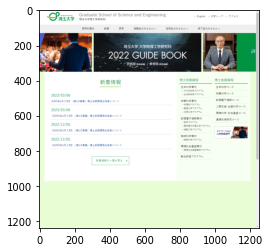

In [10]:
image_file = 'dm03_selenium_screenshot_1.png'
# selenium の初期設定
options = Options()
# Google Colab の場合は、次の2行のコメントアウトを外す (ブラウザが表示されない)
# options.add_argument('--headless')
# options.add_argument('--no-sandbox')

# URLで指定されたWebページをブラウザで表示
driver = webdriver.Chrome(options=options)
driver.get('https://www.saitama-u.ac.jp/rikogaku/')
time.sleep(5) # 5秒スリープ

# ブラウザのスクリーンショットを保存
driver.save_screenshot(image_file)

# selenium のドライバを修了
driver.quit()

# 画像を読込み変数に格納し、表示
image = plt.imread(image_file)
plt.imshow(image)

検索結果 1件目 学部・大学院 | 大学院理工学研究科 | 最新情報 - 埼玉大学


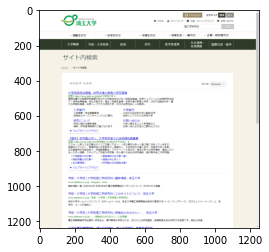

In [18]:
from selenium.webdriver.common.by import By

image_file = 'dm03_selenium_screenshot_2.png'
# selenium の初期設定
options = Options()
# Google Colab の場合は、次の2行のコメントアウトを外す (ブラウザが表示されない)
# options.add_argument('--headless')
# options.add_argument('--no-sandbox')

# URLで指定されたWebページをブラウザで表示
driver = webdriver.Chrome(options=options)
driver.get('https://www.saitama-u.ac.jp/index.html')
time.sleep(1) # 1秒スリープ
# 「検索」をクリック
search_button = driver.find_element(By.CSS_SELECTOR, "body > div.main > div.navi > div > ul.btn > li:nth-child(2) > label")
search_button.click()
time.sleep(1) # 1秒スリープ
# 「理工学研究科」を検索
search = driver.find_element(By.CSS_SELECTOR, "#cse-search-box > div > input[type=text]:nth-child(4)")
search.send_keys('理工学研究科') # 検索ワードを送信する
time.sleep(1) # 1秒スリープ
search.submit()                 # 検索を実行
time.sleep(1) # 1秒スリープ
#  検索結果 1件目のテキストを表示 (広告除く)
element = driver.find_element(By.CSS_SELECTOR, "#___gcse_0 > div > div > div > div.gsc-wrapper "
                                              + "> div.gsc-resultsbox-visible > div > div " 
                                              + "> div.gsc-expansionArea > div:nth-child(1) " 
                                              + "> div.gs-webResult.gs-result > div.gsc-thumbnail-inside > div > a")
print('検索結果 1件目', element.text)

# ブラウザのスクリーンショットを保存
driver.save_screenshot(image_file)
# selenium のドライバを修了
driver.quit()

# 画像を読込み変数に格納し、表示
image = plt.imread(image_file)
plt.imshow(image)